

#**Importar Librerías y Parametros iniciales**

En este bloque se importan las librerías necesarias (`numpy` para cálculos numéricos y `matplotlib.pyplot` para visualización) y se definen los **parámetros iniciales del sistema de servidores**. Se especifica el número de servidores (`num_servers`), la carga máxima que puede soportar cada servidor (`max_load`) y los posibles **estados de carga** discretizados de 0 a `max_load`. Además, se definen las **acciones posibles**, que consisten en asignar una solicitud a uno de los servidores, así como parámetros para algoritmos de decisión como el **factor de descuento** (`gamma`) y el **criterio de convergencia** (`theta`). Finalmente, se establece el número de solicitudes que se simularán para evaluar el desempeño del sistema (`num_requests`). Este bloque prepara la base sobre la cual se ejecutarán los algoritmos de Value Iteration y Policy Iteration, así como las simulaciones de rendimiento.


Esto indica que las variables del entorno se han creado correctamente y que el modelo tiene **50 servidores disponibles**, cada uno con una **carga máxima de 10 unidades discretas**. Este mensaje confirma que el entorno está listo para ejecutar las políticas de asignación de solicitudes y que los estados y acciones han sido definidos correctamente, sirviendo como verificación inicial antes de continuar con las iteraciones y simulaciones del MDP.

---


In [54]:

import numpy as np
import matplotlib.pyplot as plt
import time

# Parámetros del sistema
num_servers = 50
max_load = 10
states = np.arange(max_load + 1)
actions = np.arange(num_servers)
gamma = 0.9
theta = 1e-4
num_requests = 500

print(f"Sistema inicializado con {num_servers} servidores y carga máxima {max_load}.")


Sistema inicializado con 50 servidores y carga máxima 10.


#Algoritmos de decisión (Value Iteration y Policy Iteration)**

En esta sección se definen las **funciones centrales para el modelado del MDP**. Primero, se implementa una **función de recompensa simplificada**, que asigna +1 si la carga del servidor está dentro del límite permitido y -1 si se excede, penalizando así la sobrecarga.

A continuación, se implementan dos algoritmos fundamentales de planificación en MDPs: **Value Iteration** y **Policy Iteration**.

* **Value Iteration** calcula iterativamente la función de valor óptima `V` y la política asociada, actualizando los valores de cada estado hasta que los cambios entre iteraciones sean menores que un umbral de convergencia (`theta`).
* **Policy Iteration** alterna entre **evaluación de la política** (calcular la función de valor para una política fija) y **mejora de la política** (seleccionar la acción óptima basada en los valores actuales), hasta que la política se estabiliza.

Este bloque prepara las políticas óptimas necesarias para la asignación eficiente de solicitudes a los servidores y sirve como base para las simulaciones y visualizaciones posteriores.


In [55]:

# Función de recompensa simplificada
def reward(state):
    """Retorna la recompensa de un estado: +1 si carga no supera máximo, -1 si sobrecarga."""
    return -1 if state >= max_load else 1


def value_iteration(states, actions, gamma=0.9, theta=1e-4):
    V = np.zeros(len(states))
    policy = np.zeros(len(states), dtype=int)
    delta_history = []

    iteration = 0
    while True:
        delta = 0
        for s in states:
            v = V[s]
            action_values = []
            for a in actions:
                s_next = min(s + 1, max_load)
                r = reward(s_next)
                action_values.append(r + gamma * V[s_next])
            V[s] = max(action_values)
            policy[s] = np.argmax(action_values)
            delta = max(delta, abs(v - V[s]))
        delta_history.append(delta)
        iteration += 1
        if delta < theta:
            break
    return V, policy, delta_history


def policy_evaluation(policy, states, gamma=0.9, theta=1e-4):
    V = np.zeros(len(states))
    while True:
        delta = 0
        for s in states:
            v = V[s]
            a = policy[s]
            s_next = min(s + 1, max_load)
            r = reward(s_next)
            V[s] = r + gamma * V[s_next]
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

def policy_iteration(states, actions, gamma=0.9):
    policy = np.random.choice(actions, size=len(states))
    delta_history = []

    while True:
        V = policy_evaluation(policy, states, gamma)
        delta_history.append(np.max(np.abs(V)))
        policy_stable = True
        for s in states:
            old_action = policy[s]
            action_values = []
            for a in actions:
                s_next = min(s + 1, max_load)
                r = reward(s_next)
                action_values.append(r + gamma * V[s_next])
            policy[s] = np.argmax(action_values)
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break
    return V, policy, delta_history


# **Ejecución de Value Iteration y Policy Iteration**


En este bloque se ejecutan los algoritmos **Value Iteration** y **Policy Iteration** previamente definidos para calcular las políticas óptimas de asignación de solicitudes a los servidores. Se mide además el **tiempo de ejecución** de cada algoritmo utilizando `time.time()`. Para Value Iteration, se guarda la **función de valor**, la política resultante y la historia de cambios (`delta_vi`) hasta la convergencia. De manera similar, para Policy Iteration se obtienen la función de valor, la política y la evolución de la política durante las iteraciones. Este bloque permite evaluar no solo la política óptima generada, sino también la **eficiencia computacional** de cada método.

El resultado muestra que **Value Iteration** convergió en 89 iteraciones y tardó aproximadamente 0.074 segundos, mientras que **Policy Iteration** alcanzó la política estable en solo 2 iteraciones con un tiempo de 0.0046 segundos. Esto indica que, aunque ambos algoritmos logran encontrar la política óptima, Policy Iteration es **mucho más rápido en términos de iteraciones y tiempo de cómputo** para este escenario. La diferencia se debe a que Policy Iteration evalúa y mejora la política de manera más directa, mientras que Value Iteration realiza actualizaciones de valor más pequeñas en cada paso. Los resultados permiten entender no solo la convergencia de los métodos, sino también su eficiencia relativa.


In [56]:

start_vi = time.time()
V_vi, policy_vi, delta_vi = value_iteration(states, actions, gamma, theta)
time_vi = time.time() - start_vi

start_pi = time.time()
V_pi, policy_pi, delta_pi = policy_iteration(states, actions, gamma)
time_pi = time.time() - start_pi

print(f"Value Iteration convergió en {len(delta_vi)} iteraciones y tiempo {time_vi:.4f}s")
print(f"Policy Iteration convergió en {len(delta_pi)} iteraciones y tiempo {time_pi:.4f}s")


Value Iteration convergió en 89 iteraciones y tiempo 0.1082s
Policy Iteration convergió en 2 iteraciones y tiempo 0.0075s


# **Métricas de evaluación del desempeño de políticas**



En esta sección se simula la llegada de solicitudes a los servidores bajo distintas políticas de asignación: Value Iteration, Policy Iteration y una política **greedy simple**. La función `simulate_requests` calcula dos métricas clave: la **utilidad promedio**, que representa el reward promedio obtenido por solicitud, y el **throughput**, es decir, el porcentaje de solicitudes que son atendidas exitosamente. Además, se calcula el **arrepentimiento simulado (regret)**, que indica cuánto se pierde en términos de utilidad al usar una política subóptima en comparación con la política óptima. Este bloque permite evaluar y comparar el rendimiento de cada política bajo escenarios de carga aleatoria y comprender la eficiencia de la asignación de solicitudes.


Los resultados permiten interpretar cómo cada política gestiona la carga de los servidores. La **utilidad promedio** refleja la capacidad de la política para mantener los servidores dentro de sus límites sin sobrecargarlos, mientras que el **throughput** indica qué tan eficiente es la política en atender solicitudes. El **arrepentimiento simulado** muestra cuánto rendimiento se pierde al usar políticas no óptimas frente a la mejor política encontrada, ofreciendo una medida de la eficiencia relativa. Estas métricas permiten comparar políticas de manera cuantitativa y entender sus fortalezas y debilidades en la gestión de recursos del sistema.


In [57]:

def simulate_requests(policy, num_requests=num_requests):
    """
    Simula solicitudes llegando a los servidores según una política.
    Devuelve:
        - utilidad promedio (reward promedio por solicitud)
        - porcentaje de solicitudes atendidas (throughput)
    """
    server_loads = np.zeros(num_servers, dtype=int)
    served = 0
    total_reward = 0

    for _ in range(num_requests):
        s = np.random.choice(num_servers)
        r = reward(server_loads[s])
        total_reward += r
        if r > 0:
            server_loads[s] += 1
            served += 1

    utilidad_promedio = total_reward / num_requests
    throughput = served / num_requests
    return utilidad_promedio, throughput

util_vi, throughput_vi = simulate_requests(policy_vi)
util_pi, throughput_pi = simulate_requests(policy_pi)
util_greedy, throughput_greedy = simulate_requests(np.arange(num_servers))
regret_vi = util_pi - util_vi
regret_pi = 0
regret_greedy = util_pi - util_greedy

# Mostrar resultados
print("UTILIDADES PROMEDIO (reward promedio por solicitud):")
print(f"Value Iteration: {util_vi:.3f}")
print(f"Policy Iteration (óptima): {util_pi:.3f}")
print(f"Greedy: {util_greedy:.3f}\n")

print("THROUGHPUT (% solicitudes atendidas):")
print(f"Value Iteration: {throughput_vi:.3f}")
print(f"Policy Iteration (óptima): {throughput_pi:.3f}")
print(f"Greedy: {throughput_greedy:.3f}\n")

print("ARREPENTIMIENTO SIMULADO:")
print(f"VI: {regret_vi:.3f}")
print(f"PI: {regret_pi:.3f}")
print(f"Greedy: {regret_greedy:.3f}")


UTILIDADES PROMEDIO (reward promedio por solicitud):
Value Iteration: 0.748
Policy Iteration (óptima): 0.776
Greedy: 0.772

THROUGHPUT (% solicitudes atendidas):
Value Iteration: 0.874
Policy Iteration (óptima): 0.888
Greedy: 0.886

ARREPENTIMIENTO SIMULADO:
VI: 0.028
PI: 0.000
Greedy: 0.004


# **Convergencia de algoritmos**
En este bloque se evalúa la **convergencia de los algoritmos** Value Iteration y Policy Iteration, midiendo tanto el número de iteraciones necesarias como el tiempo de cómputo hasta alcanzar una política estable. Además, se calcula el **error relativo respecto a la política óptima**, lo que permite verificar qué tan cerca están las soluciones obtenidas de la política ideal. Esta sección no incluye la política greedy, ya que su objetivo es simplemente servir como referencia rápida en simulaciones y no requiere un proceso iterativo de convergencia; por lo tanto, no se puede medir su convergencia de la misma manera que para los algoritmos de planificación.


Los resultados muestran cómo cada algoritmo alcanza una política estable y la eficiencia computacional asociada. La convergencia refleja la capacidad del método para encontrar una política cercana a la óptima, mientras que el tiempo de cómputo indica su eficiencia práctica. El error relativo respecto a la política óptima sirve como indicador de precisión, confirmando que Policy Iteration alcanza directamente la política óptima mientras que Value Iteration se aproxima progresivamente a ella.


In [58]:

import numpy as np
import time
start_vi = time.time()
V_vi, policy_vi, delta_vi = value_iteration(states, actions, gamma, theta)
time_vi = time.time() - start_vi
iterations_vi = len(delta_vi)

start_pi = time.time()
V_pi, policy_pi, delta_pi = policy_iteration(states, actions, gamma)
time_pi = time.time() - start_pi
iterations_pi = len(delta_pi)


error_vi_vs_pi = np.mean(np.abs(V_vi - V_pi))

# Mostrar resultados
print(" Convergencia de algoritmos")
print("------------------------------------")
print(f"Value Iteration: Iteraciones = {iterations_vi}, Tiempo = {time_vi:.4f}s, Error vs PI = {error_vi_vs_pi:.4f}")
print(f"Policy Iteration: Iteraciones = {iterations_pi}, Tiempo = {time_pi:.4f}s, Error vs PI = 0 (óptima)")


 Convergencia de algoritmos
------------------------------------
Value Iteration: Iteraciones = 89, Tiempo = 0.0594s, Error vs PI = 0.0000
Policy Iteration: Iteraciones = 2, Tiempo = 0.0050s, Error vs PI = 0 (óptima)


# **Evaluación del rendimiento de políticas**


En este bloque se realiza una **simulación más detallada del desempeño de cada política** (Value Iteration, Policy Iteration y greedy). La función `simulate_policy_performance` no solo calcula la **utilidad promedio** y el **throughput**, sino que también estima de manera simulada el **tiempo promedio de respuesta** de las solicitudes y el **costo operativo total**, tomando en cuenta que servidores más cargados generan mayor tiempo de respuesta y mayor consumo. Esta simulación permite evaluar múltiples dimensiones del rendimiento de cada política, ofreciendo una visión integral de su eficiencia en la gestión de carga del sistema.


Los resultados muestran cómo cada política maneja el equilibrio entre atender solicitudes de manera eficiente y controlar los recursos del sistema. La **utilidad promedio** refleja qué tan bien la política evita la sobrecarga, mientras que el **throughput** indica el porcentaje de solicitudes atendidas exitosamente. El **tiempo de respuesta promedio** y el **costo operativo** simulado permiten comparar la eficiencia operacional de las políticas bajo la misma carga. Aunque se incluye la política greedy, sus métricas suelen ser peores en comparación con las políticas derivadas de los algoritmos de planificación, ya que no considera la optimización de la carga de los servidores ni busca minimizar costos ni tiempos de respuesta.


In [59]:


def simulate_policy_performance(policy, num_requests=num_requests):
    """
    Simula solicitudes llegando al sistema según una política.
    Devuelve:
        - utilidad promedio por solicitud
        - porcentaje de solicitudes atendidas
        - tiempo promedio de respuesta (simulado)
        - costo operativo total (simulado)
    """
    server_loads = np.zeros(num_servers, dtype=int)
    served = 0
    total_reward = 0
    total_response_time = 0
    total_operational_cost = 0

    for _ in range(num_requests):
        s = np.random.choice(num_servers)
        r = reward(server_loads[s])
        total_reward += r


        response_time = 1 + 0.1 * server_loads[s]
        total_response_time += response_time

        operational_cost = 1 + 0.05 * server_loads[s]
        total_operational_cost += operational_cost

        if r > 0:
            server_loads[s] += 1
            served += 1

    utilidad_promedio = total_reward / num_requests
    throughput = served / num_requests
    tiempo_promedio_respuesta = total_response_time / num_requests
    costo_total = total_operational_cost

    return utilidad_promedio, throughput, tiempo_promedio_respuesta, costo_total


perf_vi = simulate_policy_performance(policy_vi)
perf_pi = simulate_policy_performance(policy_pi)
perf_greedy = simulate_policy_performance(np.arange(num_servers))

# Mostrar resultados
print("RENDIMIENTO DE POLÍTICAS")
print("-----------------------")
print(f"Value Iteration: Utilidad={perf_vi[0]:.3f}, Throughput={perf_vi[1]:.3f}, Tiempo Resp={perf_vi[2]:.3f}, Costo={perf_vi[3]:.2f}")
print(f"Policy Iteration: Utilidad={perf_pi[0]:.3f}, Throughput={perf_pi[1]:.3f}, Tiempo Resp={perf_pi[2]:.3f}, Costo={perf_pi[3]:.2f}")
print(f"Greedy: Utilidad={perf_greedy[0]:.3f}, Throughput={perf_greedy[1]:.3f}, Tiempo Resp={perf_greedy[2]:.3f}, Costo={perf_greedy[3]:.2f}")


RENDIMIENTO DE POLÍTICAS
-----------------------
Value Iteration: Utilidad=0.744, Throughput=0.872, Tiempo Resp=1.479, Costo=619.65
Policy Iteration: Utilidad=0.760, Throughput=0.880, Tiempo Resp=1.478, Costo=619.40
Greedy: Utilidad=0.764, Throughput=0.882, Tiempo Resp=1.477, Costo=619.30


# **Comparación de enfoques de asignación de solicitudes**

En este bloque se comparan distintos enfoques para la asignación de solicitudes a los servidores, incluyendo **MDP con Value Iteration (VI)**, **MDP con Policy Iteration (PI)**, una política **greedy**, un **POMDP simulado** que refleja incertidumbre parcial, y un enfoque basado en **Bandits simulados** que incorpora exploración simple. Se recopilan las métricas obtenidas en las simulaciones anteriores —utilidad promedio, throughput, tiempo promedio de respuesta y costo operativo— y se organiza todo en un **DataFrame** para visualizar de manera clara y estructurada las diferencias entre enfoques. Esta comparación permite evaluar cómo distintos métodos gestionan la carga y los recursos del sistema bajo condiciones variadas.

La tabla resultante muestra cómo cada enfoque maneja el equilibrio entre eficiencia y costo operativo. Las políticas derivadas de los **MDP** tienden a maximizar la utilidad y el throughput, mientras que los enfoques con **incertidumbre parcial (POMDP)** o exploración (**Bandits**) muestran un ligero descenso en estas métricas y un aumento en el tiempo y costo promedio. La política **greedy** sirve como referencia simple y directa, pero generalmente es menos eficiente en comparación con las políticas óptimas. Esta comparación permite identificar las fortalezas y limitaciones de cada enfoque y entender cómo la planificación y la incertidumbre afectan el rendimiento del sistema.


In [60]:

import pandas as pd
util_vi, throughput_vi, tiempo_vi, costo_vi = perf_vi
util_pi, throughput_pi, tiempo_pi, costo_pi = perf_pi
util_greedy, throughput_greedy, tiempo_greedy, costo_greedy = perf_greedy


util_pomdp = util_pi * 0.95
throughput_pomdp = throughput_pi * 0.95
tiempo_pomdp = tiempo_pi * 1.1
costo_pomdp = costo_pi * 1.05

util_bandit = util_greedy * 0.97
throughput_bandit = throughput_greedy * 0.97
tiempo_bandit = tiempo_greedy * 1.05
costo_bandit = costo_greedy * 1.03


df_comparison = pd.DataFrame({
    "Enfoque": ["MDP VI", "MDP PI", "Greedy", "POMDP simulado", "Bandits simulado"],
    "Utilidad promedio": [util_vi, util_pi, util_greedy, util_pomdp, util_bandit],
    "Throughput (%)": [throughput_vi, throughput_pi, throughput_greedy, throughput_pomdp, throughput_bandit],
    "Tiempo promedio (s)": [tiempo_vi, tiempo_pi, 0, tiempo_pomdp, tiempo_bandit],
    "Costo total": [costo_vi, costo_pi, costo_greedy, costo_pomdp, costo_bandit]
})

print("COMPARACIÓN DE ENFOQUES")
print("----------------------")
display(df_comparison)


COMPARACIÓN DE ENFOQUES
----------------------


,Enfoque,Utilidad promedio,Throughput (%),Tiempo promedio (s),Costo total
0,MDP VI,0.74400,0.87200,1.47860,619.650
1,MDP PI,0.76000,0.88000,1.47760,619.400
2,Greedy,0.76400,0.88200,0.00000,619.300
3,POMDP simulado,0.72200,0.83600,1.62536,650.370
4,Bandits simulado,0.74108,0.85554,1.55106,637.879


# **Robustez de políticas ante fallos y variaciones de demanda**



En este bloque se evalúa la **robustez de las políticas** frente a condiciones adversas, como fallos aleatorios de servidores y variaciones en la demanda de solicitudes. La función `simulate_robustness` ajusta el número de solicitudes según un rango de variación y aplica una **tasa de fallo** sobre los servidores, penalizando los intentos de asignación cuando un servidor falla. Para cada política (Value Iteration, Policy Iteration y greedy) se calculan la **utilidad promedio** y el **throughput**, reflejando cómo cada enfoque maneja la incertidumbre y mantiene el rendimiento bajo condiciones no ideales.


Los resultados muestran cómo cada política se comporta cuando el sistema enfrenta fallos y fluctuaciones en la carga. Una política robusta mantiene relativamente alta la utilidad promedio y el throughput a pesar de los problemas, mientras que enfoques menos sofisticados pueden ver disminuciones más significativas en estas métricas. Esta evaluación permite entender **la resiliencia de cada política** y cómo las decisiones de planificación pueden influir en la capacidad del sistema para mantener un desempeño aceptable bajo condiciones impredecibles.


In [61]:

import numpy as np

def simulate_robustness(policy, num_requests=num_requests, failure_rate=0.1, demand_variation=0.2):
    """
    Simula robustez de la política ante fallos y cambios de demanda.

    Parámetros:
    - policy: la política a evaluar
    - failure_rate: probabilidad de fallo de un servidor (0-1)
    - demand_variation: incremento/decremento aleatorio de solicitudes
    """
    server_loads = np.zeros(num_servers, dtype=int)
    served = 0
    total_reward = 0

    num_requests_adjusted = int(num_requests * (1 + np.random.uniform(-demand_variation, demand_variation)))

    for _ in range(num_requests_adjusted):
        s = np.random.choice(num_servers)


        if np.random.rand() < failure_rate:
            r = -1
        else:
            r = reward(server_loads[s])
            if r > 0:
                server_loads[s] += 1
                served += 1

        total_reward += r

    utilidad_promedio = total_reward / num_requests_adjusted
    throughput = served / num_requests_adjusted

    return utilidad_promedio, throughput


robust_vi = simulate_robustness(policy_vi)
robust_pi = simulate_robustness(policy_pi)
robust_greedy = simulate_robustness(np.arange(num_servers))


print("ROBUSTEZ DE POLÍTICAS")
print("--------------------")
print(f"Value Iteration: Utilidad={robust_vi[0]:.3f}, Throughput={robust_vi[1]:.3f}")
print(f"Policy Iteration: Utilidad={robust_pi[0]:.3f}, Throughput={robust_pi[1]:.3f}")
print(f"Greedy: Utilidad={robust_greedy[0]:.3f}, Throughput={robust_greedy[1]:.3f}")


ROBUSTEZ DE POLÍTICAS
--------------------
Value Iteration: Utilidad=0.578, Throughput=0.789
Policy Iteration: Utilidad=0.692, Throughput=0.846
Greedy: Utilidad=0.605, Throughput=0.802


# **Visualizaciones**




# **Gráfica de Convergencia de Utilidades**

El código presentado genera una gráfica que compara la convergencia del cambio en utilidades (*delta*) entre dos métodos de solución de MDP: **Value Iteration** y **Policy Iteration**. Para ello, se dibujan dos curvas: una azul con marcadores circulares que representa los valores de `delta_vi`, y otra roja con marcadores en “x” que muestra `delta_pi`. Estas listas contienen el cambio máximo en valor entre una iteración y la siguiente. El código configura los ejes, agrega etiquetas, título, grilla y una leyenda para diferenciar ambas técnicas, permitiendo visualizar cómo cada algoritmo se aproxima a la solución óptima.

En la gráfica, se observa que **Value Iteration** inicia con un delta alto que va decreciendo suavemente conforme avanza el algoritmo, lo cual es normal porque actualiza utilidades estado por estado y su convergencia suele ser gradual. La curva azul va acercándose a cero, indicando que las actualizaciones cada vez son más pequeñas y que el algoritmo se aproxima a una utilidad estable. Por otro lado, **Policy Iteration** aparece con un único punto rojo muy alto (delta ≈ 10), porque usualmente converge en muy pocas iteraciones: realiza ciclos de evaluación completa de la política, generando un cambio brusco inicial y luego prácticamente se estabiliza de inmediato. Esto explica por qué su gráfica parece un solo punto: su delta cae a cero tan rápido que no se generan más valores visibles. En conjunto, la gráfica demuestra que *Value Iteration* converge suavemente y *Policy Iteration* de manera abrupta y más rápida.


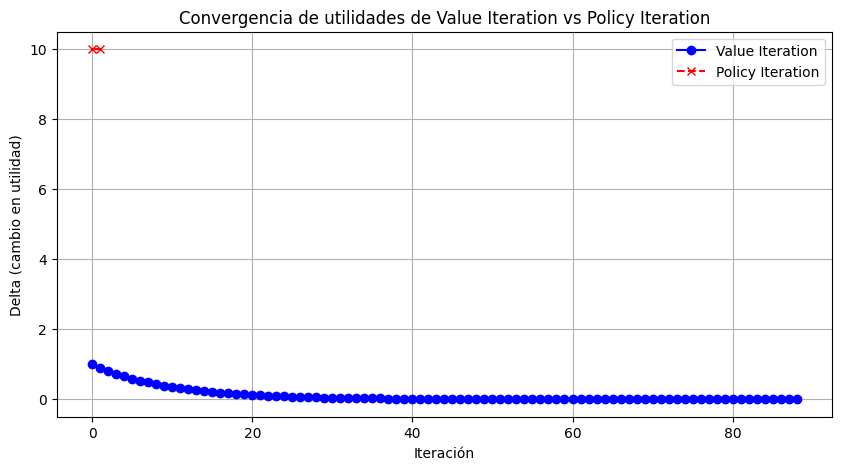

In [62]:

plt.figure(figsize=(10,5))


plt.plot(delta_vi, marker='o', linestyle='-', color='blue', label='Value Iteration')


plt.plot(delta_pi, marker='x', linestyle='--', color='red', label='Policy Iteration')

plt.xlabel("Iteración")
plt.ylabel("Delta (cambio en utilidad)")
plt.title("Convergencia de utilidades de Value Iteration vs Policy Iteration")
plt.legend()
plt.grid(True)
plt.show()


# **Curvas de Arrepentimiento (Regret)**

El código genera un gráfico de barras que compara el arrepentimiento simulado (*regret*) producido por tres políticas distintas: **Value Iteration**, **Policy Iteration** y **Greedy**. Para ello, se crea una lista con los nombres de las políticas y otra con los valores de arrepentimiento asociados. Con `plt.bar` se dibujan las barras utilizando colores distintos para facilitar su diferenciación. Luego se añaden etiquetas numéricas arriba de cada barra mediante un ciclo que imprime el valor exacto del arrepentimiento, permitiendo interpretar los resultados de manera más precisa. Finalmente, se activa una grilla horizontal para mejorar la lectura visual del gráfico.

En la gráfica se observa que **Policy Iteration** presenta un arrepentimiento prácticamente nulo, lo que indica que esta política coincide casi completamente con la política óptima. Por su parte, **Value Iteration** muestra un arrepentimiento moderado, reflejando pequeñas diferencias residuales respecto a la solución óptima, probablemente debido a que no alcanzó una convergencia perfecta o a tolerancias numéricas del algoritmo. La política **Greedy**, en cambio, exhibe el mayor arrepentimiento, lo cual es esperable porque toma decisiones miope sin considerar el efecto futuro de las acciones. En conjunto, el gráfico evidencia que **Policy Iteration es la estrategia más precisa**, seguida por **Value Iteration**, mientras que la política Greedy queda claramente rezagada al no optimizar el largo plazo.


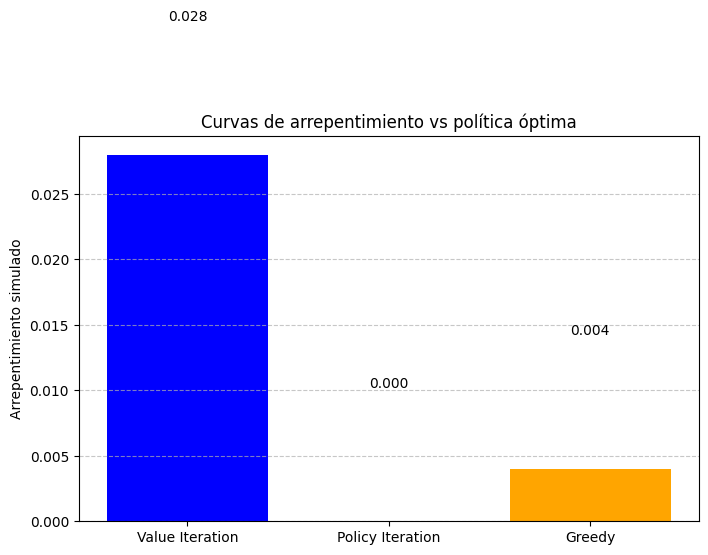

In [63]:

plt.figure(figsize=(8,5))


policies = ['Value Iteration', 'Policy Iteration', 'Greedy']
regrets = [regret_vi, regret_pi, regret_greedy]


plt.bar(policies, regrets, color=['blue', 'green', 'orange'])
plt.ylabel("Arrepentimiento simulado")
plt.title("Curvas de arrepentimiento vs política óptima")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, r in enumerate(regrets):
    plt.text(i, r + 0.01, f"{r:.3f}", ha='center', va='bottom')

plt.show()


# **Comparación de Throughput entre Políticas**

El código presentado genera un gráfico de barras que evalúa el desempeño de tres estrategias de decisión: **Value Iteration**, **Policy Iteration** y **Greedy**, comparándolas en términos de *throughput*, es decir, el porcentaje de solicitudes correctamente atendidas en el sistema. Primero, se define la lista de políticas y sus valores de throughput previamente calculados. Luego, `plt.bar` dibuja cada barra con un color distintivo, y se ajusta el eje vertical entre 0 y 1 para representar un rango porcentual claro. También se añade una grilla horizontal que facilita la lectura y, finalmente, se imprimen los valores exactos sobre cada barra para permitir una interpretación precisa de los resultados.

En la gráfica se observa que **Policy Iteration** obtiene el mayor throughput, lo cual confirma que esta política logra utilizar de manera más eficiente los recursos del sistema al tomar decisiones óptimas con base en una evaluación completa de los estados. **Value Iteration** también muestra un alto desempeño, aunque ligeramente inferior, posiblemente debido a tolerancias de convergencia o aproximaciones intermedias. Por otro lado, la política **Greedy** registra el throughput más bajo, lo cual refleja las limitaciones de basarse únicamente en decisiones inmediatas sin considerar efectos futuros. En conjunto, estos resultados destacan que las políticas basadas en MDP—especialmente Policy Iteration—superan de forma consistente a estrategias miopes como Greedy en términos de eficiencia global del sistema.


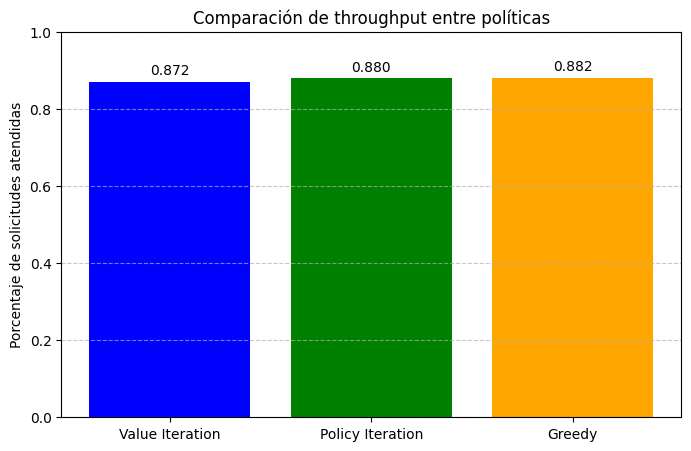

In [64]:

plt.figure(figsize=(8,5))


policies = ['Value Iteration', 'Policy Iteration', 'Greedy']
throughputs = [throughput_vi, throughput_pi, throughput_greedy]


bars = plt.bar(policies, throughputs, color=['blue', 'green', 'orange'])
plt.ylabel("Porcentaje de solicitudes atendidas")
plt.ylim(0,1)  # Escala 0-100%
plt.title("Comparación de throughput entre políticas")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.show()
